 🛒 Olist E-Commerce Data Analysis – Phase 2: Exploratory Data Analysis (EDA)

In this notebook, we explore customer behavior, seller performance, product attributes, 
and delivery patterns using insightful visualizations. 
This helps uncover patterns and areas for business improvement.


📌 What's inside this notebook?

We'll analyze:
 📦 Product characteristics (volume, photos, description length, etc.)
 🧾 Customer behavior and wait times
 🚚 Shipping and delivery performance
 🧑‍💼 Seller performance
 📍 Geographic delivery patterns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("olist_cleaned.csv")

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_volume_cm3,delivery_time_days,delay_vs_estimate,is_late,is_delivered,is_fast_shipping,price_per_cm3,total_order_value,customer_wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,1976.0,8,-8,False,True,False,0.015169,38.71,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,4693.0,13,-6,False,True,False,0.025288,141.46,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,9576.0,9,-18,False,True,False,0.016696,179.12,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,6000.0,13,-13,False,True,False,0.007499,72.20,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,11475.0,2,-10,False,True,True,0.001734,28.62,2


In [5]:
df[['product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3']].head()


,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,19.0,8.0,13.0,1976.0
1,19.0,13.0,19.0,4693.0
2,24.0,19.0,21.0,9576.0
3,30.0,10.0,20.0,6000.0
4,51.0,15.0,15.0,11475.0


In [6]:
df[['product_volume_cm3', 'product_weight_g']].describe()


,product_volume_cm3,product_weight_g
count,110195.000000,110195.000000
mean,15171.963628,2089.347076
std,23236.836430,3741.303268
min,168.000000,0.000000
25%,2850.000000,300.000000
50%,6460.000000,700.000000
75%,18144.000000,1800.000000
max,296208.000000,40425.000000


Distribution of Product Volume

We’ll visualize how product volumes are distributed to identify skewness, outliers, or patterns in product sizing.


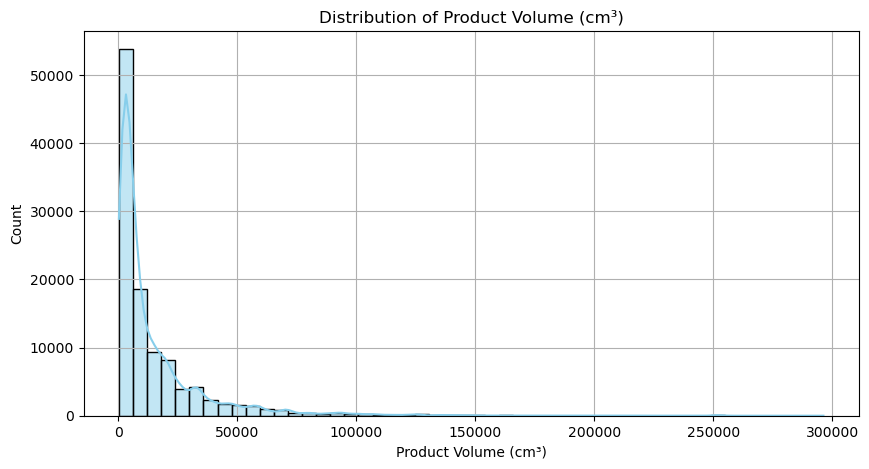

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['product_volume_cm3'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Product Volume (cm³)')
plt.xlabel('Product Volume (cm³)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Correlation Between Product Volume and Weight

Let’s examine if there’s a relationship between how large a product is (volume) and how heavy it is (weight). A strong correlation might indicate patterns useful for shipping cost optimization.


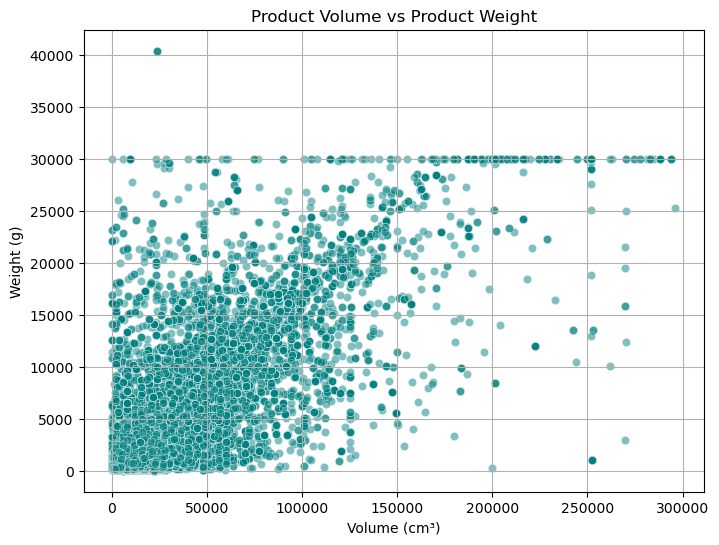

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='product_volume_cm3',
    y='product_weight_g',
    data=df,
    alpha=0.5,
    color='teal'
)
plt.title('Product Volume vs Product Weight')
plt.xlabel('Volume (cm³)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()


In [9]:
correlation = df['product_volume_cm3'].corr(df['product_weight_g'])
print(f"Correlation between volume and weight: {correlation:.2f}")


Correlation between volume and weight: 0.81


In [10]:
df[['product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_weight_g', 'product_volume_cm3']].isnull().sum()


product_length_cm     0
product_height_cm     0
product_width_cm      0
product_weight_g      0
product_volume_cm3    0
dtype: int64

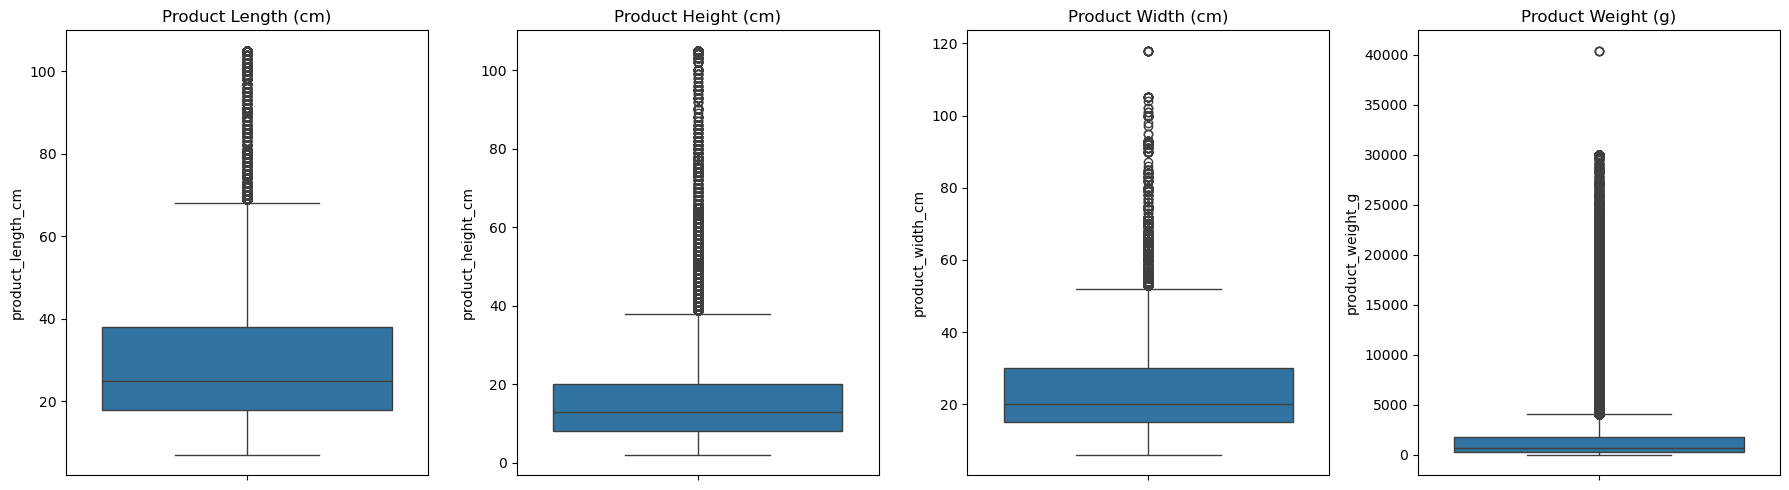

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(y=df['product_length_cm'], ax=axes[0])
axes[0].set_title('Product Length (cm)')

sns.boxplot(y=df['product_height_cm'], ax=axes[1])
axes[1].set_title('Product Height (cm)')

sns.boxplot(y=df['product_width_cm'], ax=axes[2])
axes[2].set_title('Product Width (cm)')

sns.boxplot(y=df['product_weight_g'], ax=axes[3])
axes[3].set_title('Product Weight (g)')

plt.tight_layout()
plt.show()


In [12]:
df_filtered = df[
    (df['product_length_cm'] < 100) &
    (df['product_height_cm'] < 100) &
    (df['product_width_cm'] < 100) &
    (df['product_weight_g'] < 30000)
]

I removed extreme product sizes and weights (e.g. >100 cm or >30 kg) to avoid skewed results. These could be rare products or data errors.

In [13]:
df=df_filtered

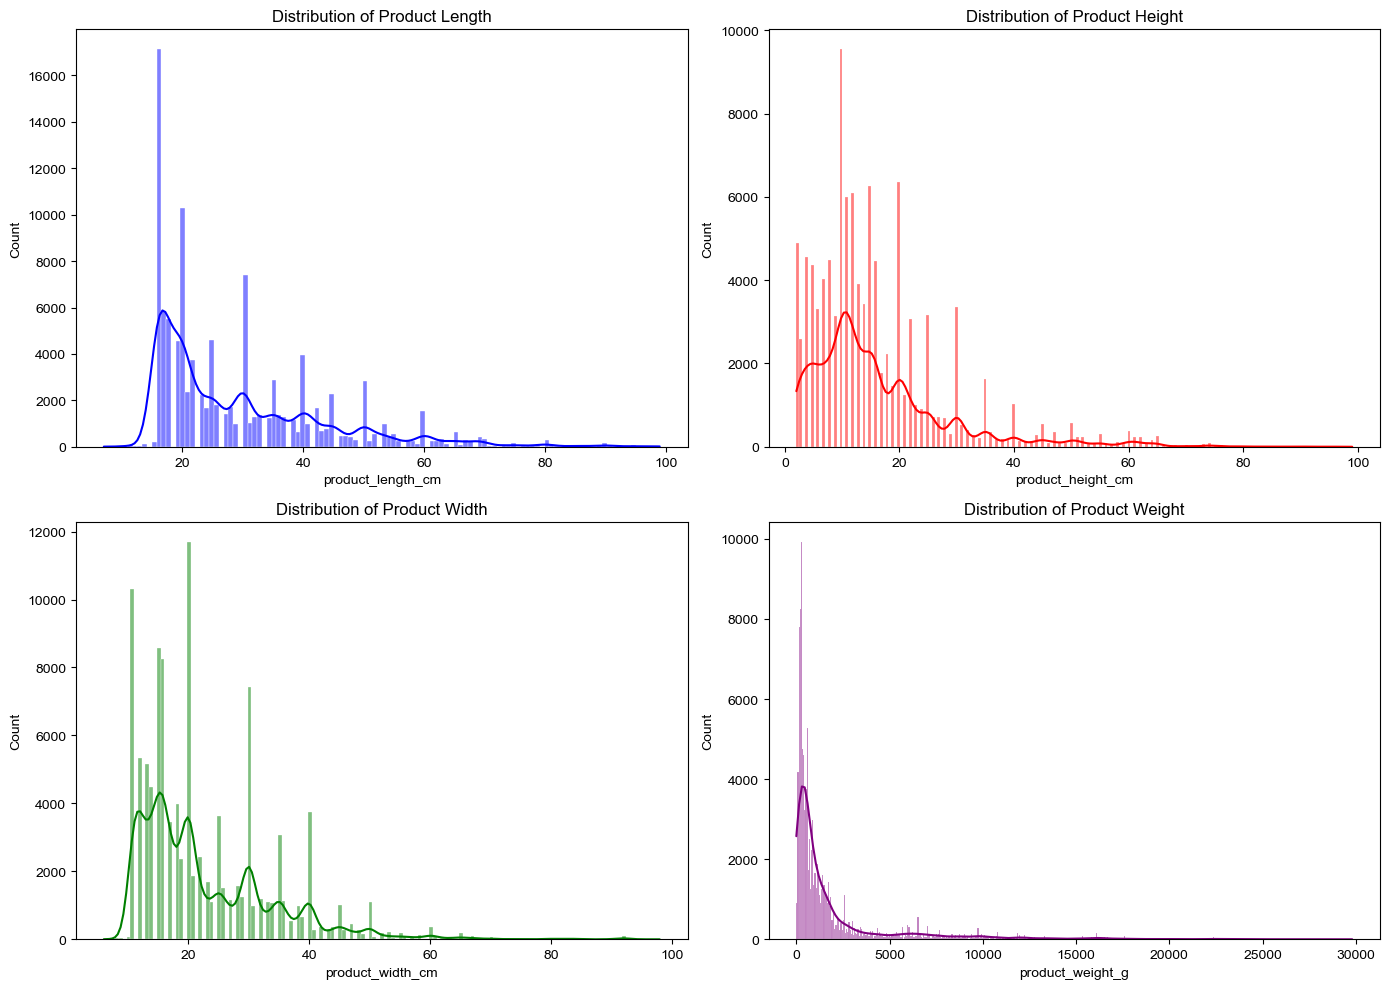

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set_style("whitegrid")

sns.histplot(df['product_length_cm'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribution of Product Length')

sns.histplot(df['product_height_cm'], kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Distribution of Product Height')

sns.histplot(df['product_width_cm'], kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Distribution of Product Width')

sns.histplot(df['product_weight_g'], kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Distribution of Product Weight')

plt.tight_layout()
plt.show()


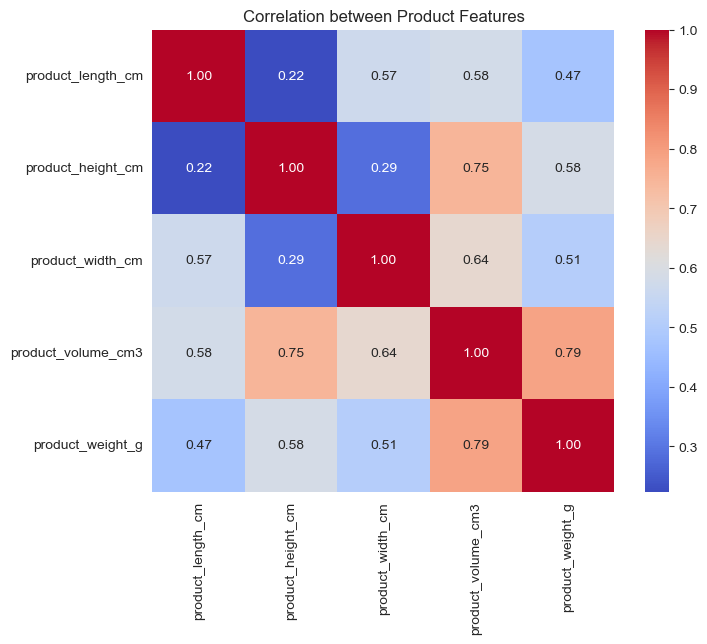

In [15]:
product_features = df[['product_length_cm', 'product_height_cm', 'product_width_cm', 
                       'product_volume_cm3', 'product_weight_g']]

correlation_matrix = product_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation between Product Features')
plt.show()


Correlation between Size & Weight

I wanted to check if heavier products are also larger. The heatmap shows:

- A strong correlation (~0.81) between volume and weight (makes sense!)
- Length and width are also somewhat related
- Height is less correlated than others

So overall, bigger products do tend to weigh more, but not always. Useful insight!

C:\Users\vrush\AppData\Local\Temp\ipykernel_29916\1429366469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=photo_counts.index, y=photo_counts.values, palette="viridis")


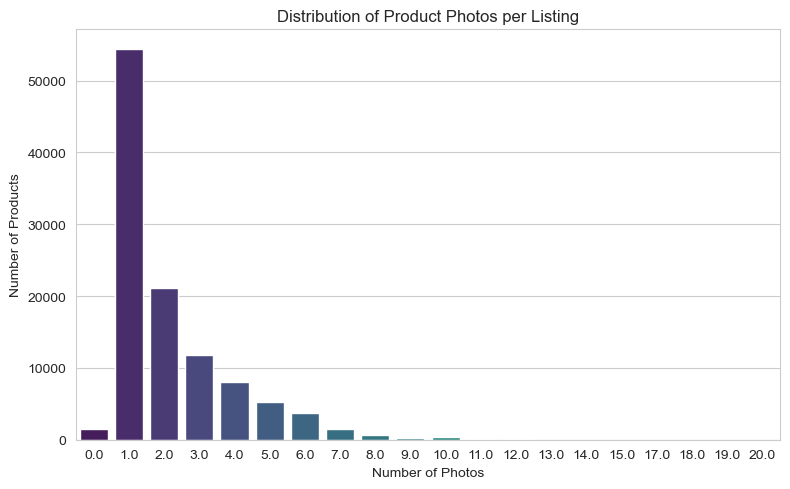

In [16]:
photo_counts = df['product_photos_qty'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=photo_counts.index, y=photo_counts.values, palette="viridis")
plt.xlabel("Number of Photos")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Photos per Listing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📸 Product Photo Count

Most products in the Olist dataset have between 1 to 4 photos. Higher photo counts can enhance customer trust and reduce return rates, but only a small percentage of listings utilize more than 4 images.


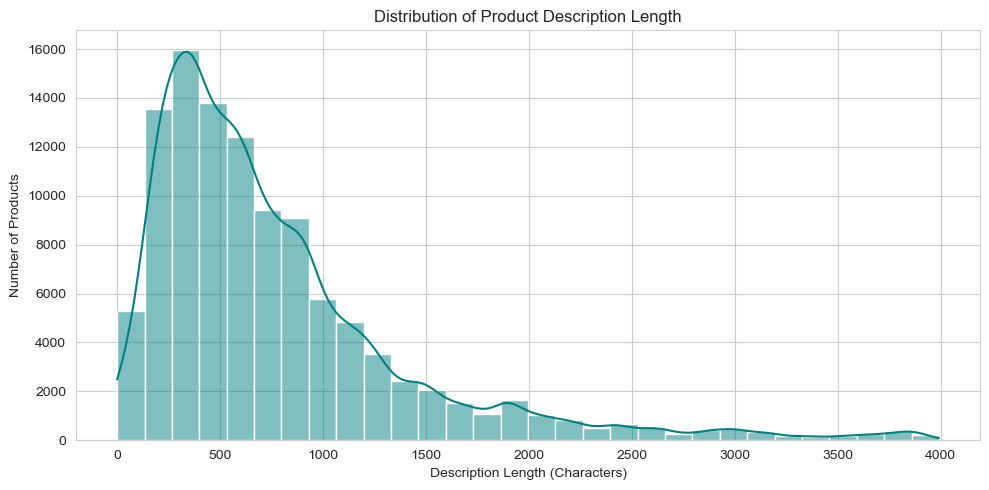

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['product_description_lenght'], bins=30, kde=True, color='teal')
plt.xlabel("Description Length (Characters)")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Description Length")
plt.tight_layout()
plt.show()


### 🧾 Product Name Length

Here we explore how long product names are. Ideally, product names should be informative but not overly long. Very short names might confuse customers, while overly long ones can be hard to read.


In [18]:
# Check basic stats of description and name length
df[['product_description_lenght', 'product_name_lenght']].describe()


,product_description_lenght,product_name_lenght
count,108725.000000,108725.000000
mean,774.797756,48.097806
std,653.760068,11.486655
min,0.000000,0.000000
25%,341.000000,42.000000
50%,594.000000,51.000000
75%,974.000000,57.000000
max,3992.000000,76.000000


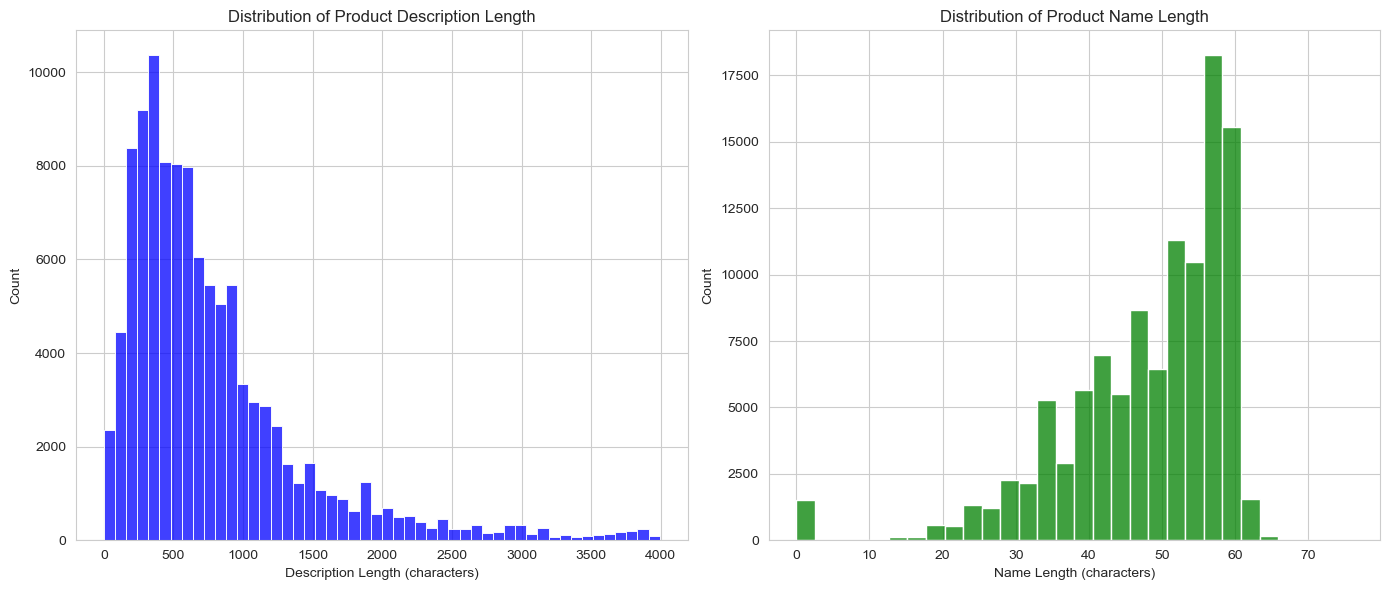

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['product_description_lenght'], bins=50, color='blue')
plt.title('Distribution of Product Description Length')
plt.xlabel('Description Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['product_name_lenght'], bins=30, color='green')
plt.title('Distribution of Product Name Length')
plt.xlabel('Name Length (characters)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [20]:

category_desc_stats = df.groupby('product_category_name')[['product_description_lenght', 'product_name_lenght']].mean().sort_values(by='product_description_lenght', ascending=False)

category_desc_stats.head(10)


,product_description_lenght,product_name_lenght
product_category_name,,
pcs,2594.798995,55.582915
musica,1475.972973,45.108108
portateis_casa_forno_e_cafe,1401.780822,51.493151
construcao_ferramentas_seguranca,1370.791209,52.917582
livros_tecnicos,1335.449612,40.468992
alimentos,1283.981964,48.939880
industria_comercio_e_negocios,1248.000000,51.468531
construcao_ferramentas_jardim,1221.043103,48.150862
alimentos_bebidas,1209.947955,43.408922



📝 Category-wise Description and Name Length Analysis
Categories like pcs, musica, and portateis_casa_forno_e_cafe have the most detailed product descriptions, often above 1400 characters. This suggests these categories may need more information to help customers understand technical features. Conversely, categories like livros_tecnicos and alimentos_bebidas tend to have shorter names or descriptions, possibly due to standardized formats or lower variation.

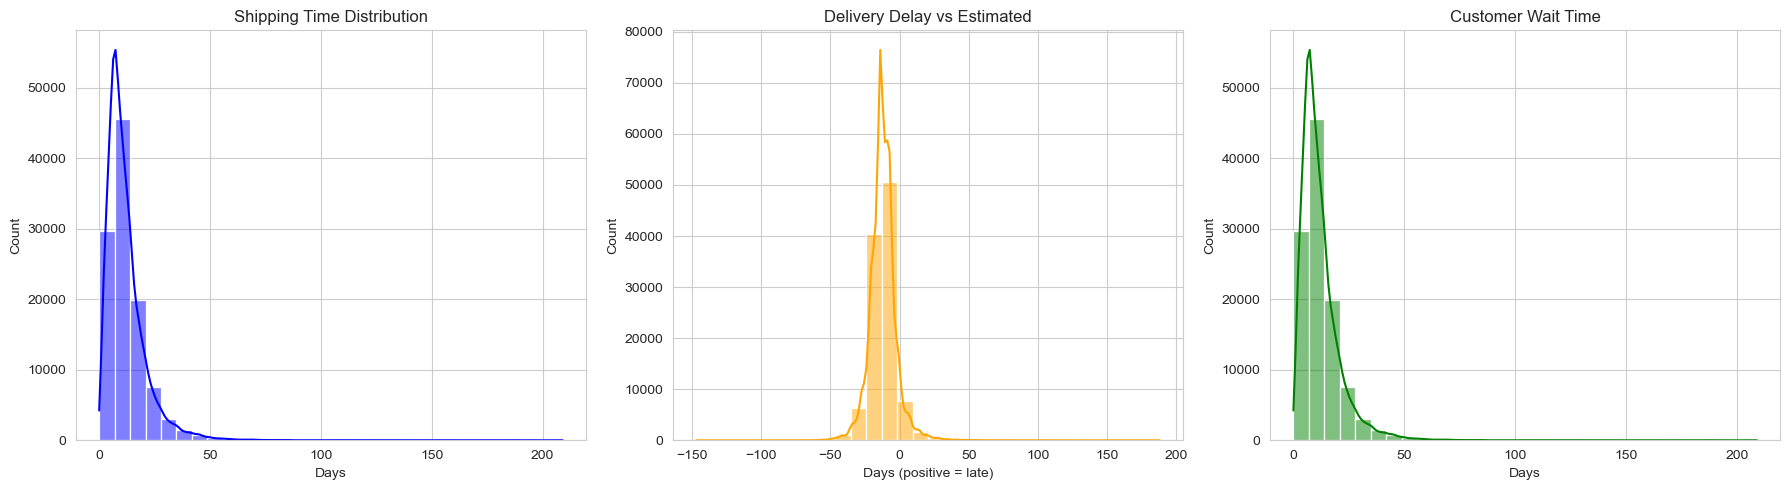

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['delivery_time_days'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Shipping Time Distribution')
axes[0].set_xlabel('Days')

sns.histplot(df['delay_vs_estimate'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Delivery Delay vs Estimated')
axes[1].set_xlabel('Days (positive = late)')

sns.histplot(df['customer_wait_time'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Customer Wait Time')
axes[2].set_xlabel('Days')

plt.tight_layout()
plt.show()


In [22]:
delivery_metrics = df.groupby('product_category_name')[
    ['delivery_time_days', 'delay_vs_estimate', 'customer_wait_time']
].mean().sort_values(by='customer_wait_time', ascending=False)

# Display top 10 categories by customer wait time
delivery_metrics.head(10)


,delivery_time_days,delay_vs_estimate,customer_wait_time
product_category_name,,,
moveis_escritorio,20.232630,-11.890819,20.232630
moveis_colchao_e_estofado,16.923077,-3.461538,16.923077
artigos_de_natal,15.300000,-12.053333,15.300000
seguros_e_servicos,15.000000,-17.000000,15.000000
fashion_calcados,14.933852,-14.832685,14.933852
casa_conforto_2,14.379310,-8.551724,14.379310
eletrodomesticos_2,13.432314,-12.484716,13.432314
fashion_underwear_e_moda_praia,13.275591,-10.929134,13.275591
ferramentas_jardim,13.252182,-11.955650,13.252182


In [23]:
df.to_csv('data.csv', index=False)
